In [42]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#载入训练数据
data_train = pd.read_csv('train_data.csv')
#print(data_train.head())
#训练数据情况
#print(data_train.info())
print(data_train.describe())
print(type(data_train))

                 ID          area    totalFloor  saleSecHouseNum  \
count  4.144000e+04  41440.000000  41440.000000     41440.000000   
mean   1.001221e+08     70.959409     11.413152         1.338538   
std    9.376566e+04     88.119569      7.375203         3.180349   
min    1.000000e+08      1.000000      0.000000         0.000000   
25%    1.000470e+08     42.607500      6.000000         0.000000   
50%    1.000960e+08     65.000000      7.000000         0.000000   
75%    1.001902e+08     90.000000     16.000000         1.000000   
max    1.003218e+08  15055.000000     88.000000        52.000000   

       subwayStationNum  busStationNum  interSchoolNum     schoolNum  \
count      41440.000000   41440.000000    41440.000000  41440.000000   
mean           5.741192     187.197153        1.506395     48.228813   
std            4.604929     179.674625        1.687631     29.568448   
min            0.000000      24.000000        0.000000      9.000000   
25%            2.000000    

In [34]:
#缺失值分析
#查看每个字段数据的缺失情况

def missing_values(data):
    alldata_na = pd.DataFrame(columns=('sum','exsitNum','missingNum','missingRatio','dtype'))
    alldata_na['missingNum'] = data.isnull().sum()
    alldata_na['exsitNum'] = len(data) - alldata_na['missingNum']
    alldata_na['missingRatio'] = alldata_na['missingNum']/len(data)*100
    alldata_na['dtype'] = data.dtypes
    #按照缺失值的数量降序排序
    alldata_na = alldata_na[alldata_na['missingNum']>0].reset_index().sort_values(by=['missingNum'],ascending=False)
    return alldata_na
missing_values(data_train)

,index,sum,exsitNum,missingNum,missingRatio,dtype
0,pv,NaN,41422,18,0.043436,float64
1,uv,NaN,41422,18,0.043436,float64


In [35]:
#单调特征列分析
def increasing(vals):
    cnt = 0
    for i in range(len(vals)-1):
        if vals[i+1]>vals[i]:
            cnt += 1
    return cnt
fea_cols = [col for col in data_train.columns]
for col in fea_cols:
    cnt = increasing(data_train[col].values)
    if cnt/data_train.shape[0]>=0.55:
        print('单调特征：',col)
        print('单调特征值个数：', cnt)
        print('单调特征值比例：', cnt / data_train.shape[0])

单调特征： tradeTime
单调特征值个数： 24085
单调特征值比例： 0.5812017374517374


ID的特征分布如下：
100077566    1
100218284    1
100027779    1
100034152    1
100097409    1
            ..
100064762    1
100276950    1
100054465    1
100086483    1
100029021    1
Name: ID, Length: 41440, dtype: int64


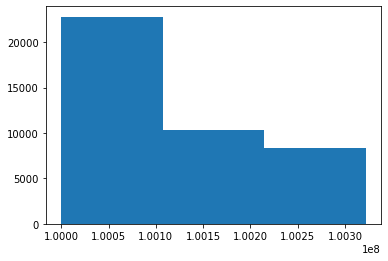

area的特征分布如下：
90.00     303
89.00     266
10.00     203
60.00     202
50.00     193
         ... 
235.50      1
159.77      1
122.54      1
116.17      1
138.53      1
Name: area, Length: 10353, dtype: int64


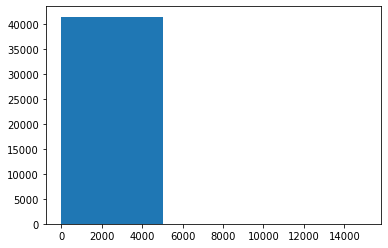

rentType的特征分布如下：
未知方式    30759
整租       5472
合租       5204
--          5
Name: rentType, dtype: int64


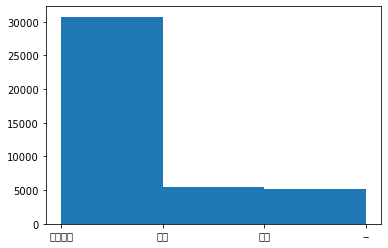

houseType的特征分布如下：
1室1厅1卫    9805
2室1厅1卫    8512
2室2厅1卫    6783
3室1厅1卫    3992
3室2厅2卫    2737
          ... 
7室1厅7卫       1
6室2厅5卫       1
7室3厅4卫       1
0室0厅1卫       1
4室1厅4卫       1
Name: houseType, Length: 104, dtype: int64


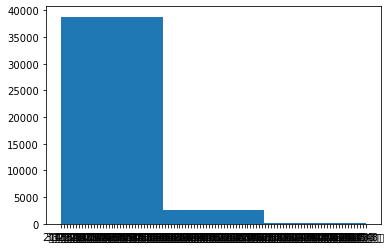

houseFloor的特征分布如下：
中    15458
高    14066
低    11916
Name: houseFloor, dtype: int64


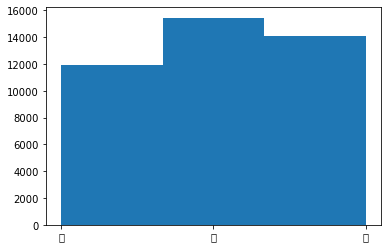

totalFloor的特征分布如下：
6     15797
18     3553
11     2884
5      2730
14     2166
17     1375
7      1362
16     1147
13      882
15      809
12      738
24      732
8       624
4       486
19      467
21      466
20      457
3       446
10      401
27      399
9       393
25      390
22      309
26      300
29      289
28      258
32      234
31      211
2       193
23      161
30      144
33      117
1        98
37       96
36       57
35       57
34       54
38       33
49       25
41       17
56       17
43       12
40       11
39       10
53        7
62        5
0         5
47        4
60        3
45        3
88        2
59        1
61        1
58        1
51        1
Name: totalFloor, dtype: int64


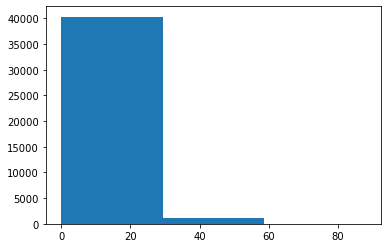

houseToward的特征分布如下：
南       34377
南北       2254
北        2043
暂无数据      963
东南        655
东         552
西         264
西南        250
西北         58
东西         24
Name: houseToward, dtype: int64


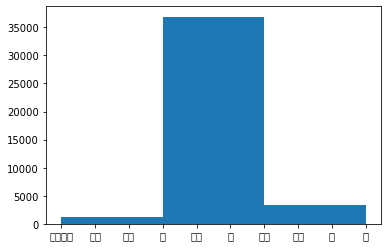

houseDecoration的特征分布如下：
其他    29040
精装    10918
简装     1171
毛坯      311
Name: houseDecoration, dtype: int64


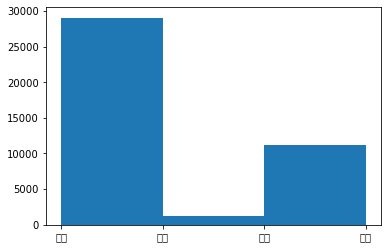

communityName的特征分布如下：
XQ01834    358
XQ01274    192
XQ02273    188
XQ03110    185
XQ02337    173
          ... 
XQ03909      1
XQ02892      1
XQ02874      1
XQ03948      1
XQ00263      1
Name: communityName, Length: 4236, dtype: int64
city的特征分布如下：
SH    41440
Name: city, dtype: int64


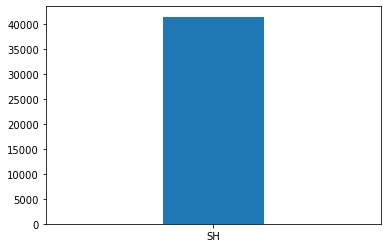

region的特征分布如下：
RG00002    11437
RG00005     5739
RG00003     4186
RG00010     3640
RG00012     3368
RG00004     3333
RG00006     1961
RG00007     1610
RG00008     1250
RG00013     1215
RG00001     1157
RG00014     1069
RG00011      793
RG00009      681
RG00015        1
Name: region, dtype: int64


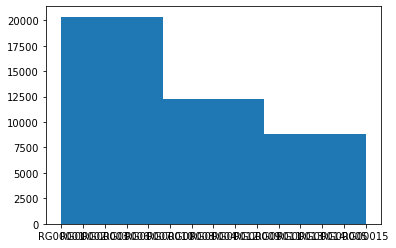

plate的特征分布如下：
BK00031    1958
BK00033    1837
BK00045    1816
BK00055    1566
BK00056    1516
           ... 
BK00016      40
BK00036      33
BK00058      15
BK00032       3
BK00001       1
Name: plate, Length: 66, dtype: int64


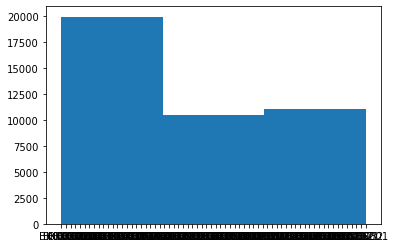

buildYear的特征分布如下：
1994    2851
暂无信息    2808
2006    2007
2007    1851
2008    1849
        ... 
1939       2
1926       2
1962       1
1950       1
1951       1
Name: buildYear, Length: 80, dtype: int64


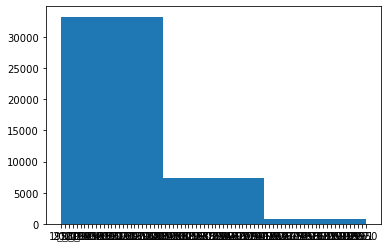

saleSecHouseNum的特征分布如下：
0     29937
1      2215
2      2020
3      1654
4      1290
5       822
6       716
7       614
8       460
9       299
11      291
10      245
14      179
13      154
12      147
18       80
27       58
15       54
19       43
21       40
17       34
16       21
23       21
20       20
26       15
38        6
34        3
52        2
Name: saleSecHouseNum, dtype: int64


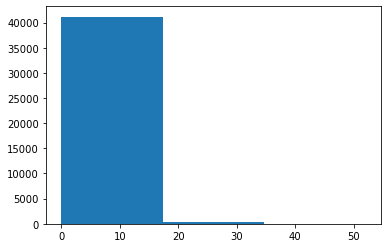

subwayStationNum的特征分布如下：
6     6778
2     6187
3     5972
5     4937
1     3440
7     3309
11    2400
4     1932
14    1794
22    1375
9     1266
13    1137
0      913
Name: subwayStationNum, dtype: int64


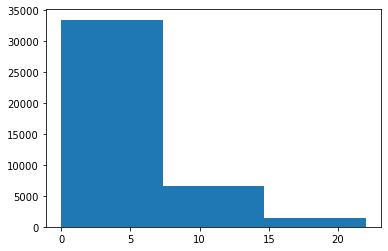

busStationNum的特征分布如下：
151    2043
461    1958
96     1837
824    1816
258    1516
276    1375
92     1305
144    1266
306    1256
364    1253
167    1227
98     1183
178    1156
441    1137
56     1016
60      979
101     906
172     880
78      849
72      834
190     819
67      745
95      719
138     679
88      671
62      651
27      646
196     618
156     614
83      613
114     610
36      590
29      579
82      577
105     549
45      523
42      498
34      455
68      444
52      435
169     398
24      397
79      357
74      344
41      343
25      281
331     278
48      219
184     211
30      189
70      157
47      127
128     122
141      98
387      40
131      33
264      15
284       3
356       1
Name: busStationNum, dtype: int64


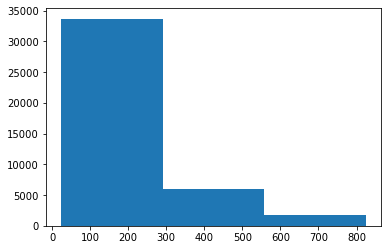

interSchoolNum的特征分布如下：
0    16177
1     8252
2     6363
3     5319
4     3677
6     1217
8      435
Name: interSchoolNum, dtype: int64


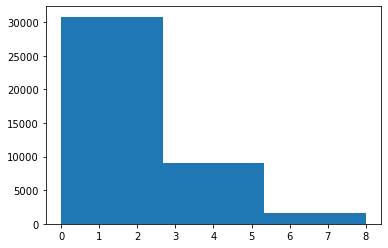

schoolNum的特征分布如下：
53     2853
21     2571
48     2498
10     2310
71     1958
61     1927
99     1816
30     1600
98     1516
13     1508
24     1468
142    1375
22     1305
60     1253
47     1141
62     1137
32     1068
43      979
28      947
50      906
64      834
69      745
41      680
37      651
20      618
39      613
44      610
38      523
18      513
59      412
23      398
45      397
72      344
9       286
65      278
29      231
74      219
26      211
14      189
11      165
57      127
16      122
15       98
52       40
Name: schoolNum, dtype: int64


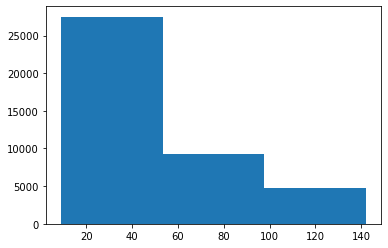

privateSchoolNum的特征分布如下：
2     8592
1     5534
9     4961
5     4118
8     3857
13    1860
15    1837
7     1429
3     1428
12    1375
4     1313
6     1242
11     899
0      857
16     849
24     679
10     610
Name: privateSchoolNum, dtype: int64


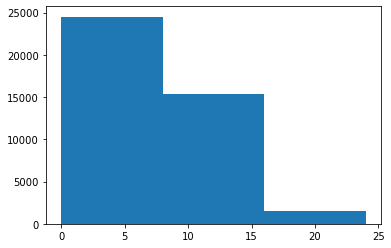

hospitalNum的特征分布如下：
1     7720
6     7162
2     6343
5     5404
3     3135
0     2661
8     2636
4     2051
11    1816
14    1375
9     1137
Name: hospitalNum, dtype: int64


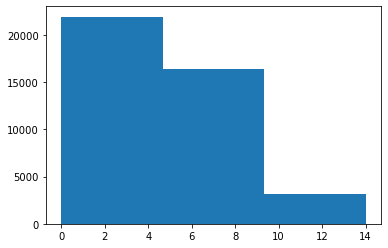

drugStoreNum的特征分布如下：
40     2623
39     2218
31     2080
69     2043
106    1958
34     1865
36     1837
174    1816
88     1516
35     1503
118    1375
37     1274
65     1266
94     1256
83     1253
54     1227
47     1156
145    1137
27     1110
22     1006
24      979
15      964
11      927
41      852
67      679
49      618
48      610
12      590
28      523
17      500
19      435
55      398
20      358
33      357
85      278
13      253
8       189
29      157
23      122
21       98
25       33
52        1
Name: drugStoreNum, dtype: int64


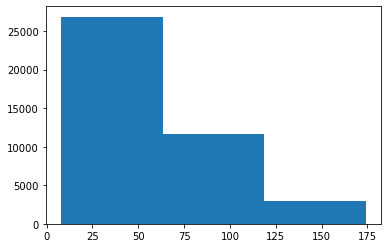

gymNum的特征分布如下：
16    3107
26    2916
25    2488
34    2488
41    2043
27    2011
36    1958
88    1816
35    1528
52    1516
64    1375
37    1256
40    1254
30    1253
23    1141
84    1137
38    1111
28     956
43     910
56     906
20     846
32     834
13     803
82     671
6      661
15     590
10     500
5      471
78     444
22     398
39     397
8      393
48     278
1      253
21     219
12     219
14     165
18     127
19       1
Name: gymNum, dtype: int64


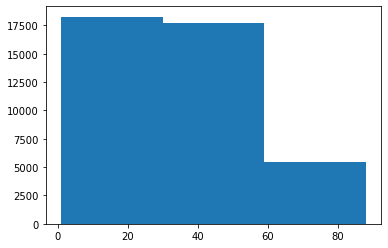

bankNum的特征分布如下：
21     3146
43     3078
86     2393
34     2043
52     1837
119    1816
50     1727
31     1686
75     1516
95     1375
16     1301
35     1289
47     1253
22     1156
91     1137
29     1136
23     1016
37      979
18      930
62      906
13      880
53      834
28      757
46      745
24      741
207     671
41      651
27      646
7       534
38      455
42      412
69      397
20      357
15      348
92      278
33      231
11      189
12      165
98      157
9       122
10       98
14       33
32       15
25        3
49        1
Name: bankNum, dtype: int64


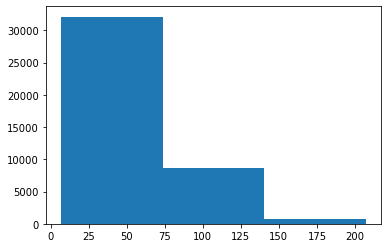

shopNum的特征分布如下：
154    2486
236    2043
598    1958
162    1837
824    1816
341    1516
483    1375
171    1305
301    1266
419    1256
358    1253
167    1227
214    1156
671    1137
189    1068
215    1016
85      979
150     930
231     906
175     880
224     846
223     834
211     745
199     671
65      646
206     614
243     613
318     610
76      590
200     549
96      523
118     500
97      498
142     455
160     444
90      435
354     412
140     397
151     357
109     348
306     344
80      343
100     329
10      281
404     278
84      253
143     219
163     211
42      189
99      165
245     157
77      122
112      33
134      15
340       3
353       1
Name: shopNum, dtype: int64


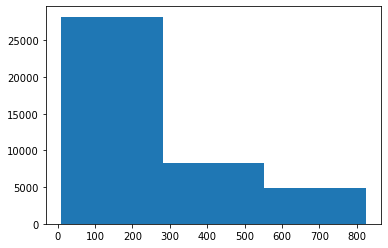

parkNum的特征分布如下：
8     6068
3     5166
6     4683
7     3906
5     3672
4     2480
1     2242
11    2134
24    1816
0     1508
23    1375
10    1266
14    1256
2     1172
30    1137
13     671
12     610
26     278
Name: parkNum, dtype: int64


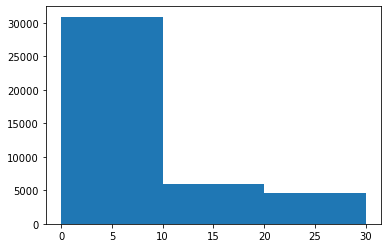

mallNum的特征分布如下：
5     5806
7     5558
2     5150
6     4404
4     3784
1     3322
3     2472
12    1958
19    1816
8     1652
10    1257
9     1247
16    1137
0      705
15     671
11     344
14     157
Name: mallNum, dtype: int64


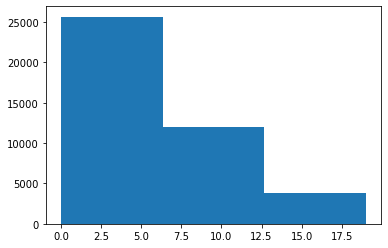

superMarketNum的特征分布如下：
56     3173
78     2043
119    1958
47     1837
299    1816
130    1516
154    1375
63     1369
74     1305
109    1266
126    1256
131    1253
100    1227
60     1156
159    1137
32     1021
37     1016
30      979
46      930
61      880
21      867
58      849
22      809
53      745
31      714
75      679
55      671
36      651
15      646
98      618
103     610
38      503
41      500
42      455
51      445
43      444
35      435
88      398
48      357
11      281
145     278
16      253
23      231
5       189
29      157
34       98
49       40
83        3
71        1
Name: superMarketNum, dtype: int64


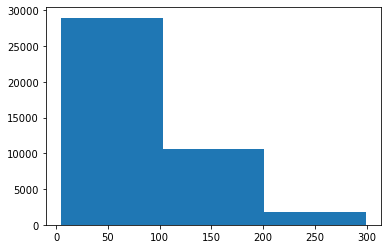

totalTradeMoney的特征分布如下：
0             423
1095010000    384
1492450000    374
878170000     339
274540000     314
             ... 
38601000        1
40660000        1
587540000       1
64970000        1
391150000       1
Name: totalTradeMoney, Length: 704, dtype: int64


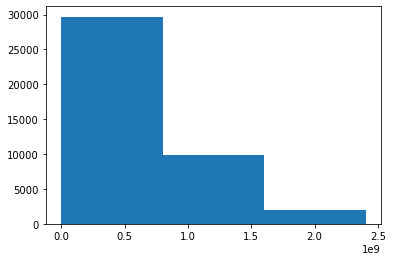

totalTradeArea的特征分布如下：
0.00        423
39571.94    384
28948.29    374
21523.39    339
7307.14     314
           ... 
3076.62       1
5931.38       1
25277.65      1
4333.89       1
3477.78       1
Name: totalTradeArea, Length: 705, dtype: int64


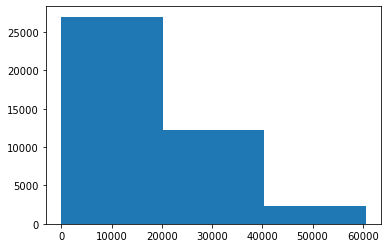

tradeMeanPrice的特征分布如下：
0.00000        423
27671.37522    384
51555.72229    374
40800.72888    339
37571.47119    314
              ... 
14991.15114      1
23243.45815      1
18185.55382      1
18565.74483      1
27332.59376      1
Name: tradeMeanPrice, Length: 705, dtype: int64


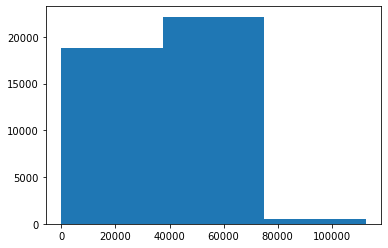

tradeSecNum的特征分布如下：
441    697
306    550
391    527
363    508
180    469
      ... 
60       7
32       5
103      4
186      2
374      1
Name: tradeSecNum, Length: 333, dtype: int64


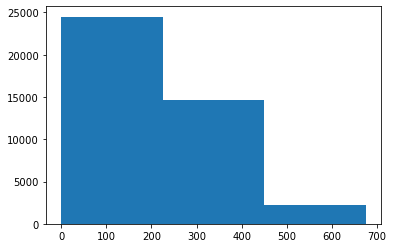

totalNewTradeMoney的特征分布如下：
0             8179
638574496      384
108869018      374
1116882        339
2128312204     314
              ... 
55724604         1
388400057        1
36991652         1
285756825        1
20569829         1
Name: totalNewTradeMoney, Length: 558, dtype: int64


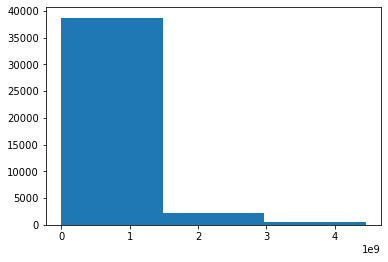

totalNewTradeArea的特征分布如下：
0        8179
15669     384
1528      374
197       356
63        339
         ... 
1597        1
933         1
255         1
6808        1
6699        1
Name: totalNewTradeArea, Length: 533, dtype: int64


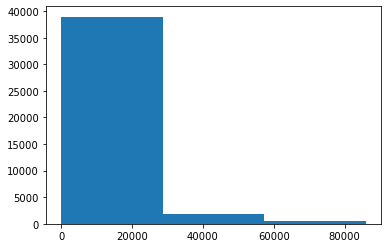

tradeNewMeanPrice的特征分布如下：
0.00000        8179
40754.00447     384
71249.35733     374
17728.28571     339
35108.49712     314
               ... 
17395.30472       1
41973.68170       1
52274.17255       1
17982.06763       1
22046.97642       1
Name: tradeNewMeanPrice, Length: 557, dtype: int64


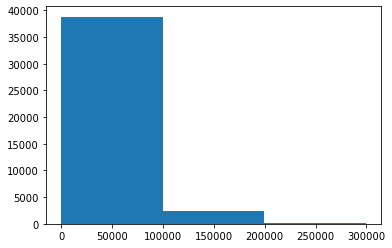

tradeNewNum的特征分布如下：
0      8179
1      3747
2      3293
6      1249
4      1208
       ... 
69        4
139       2
241       2
101       1
274       1
Name: tradeNewNum, Length: 157, dtype: int64


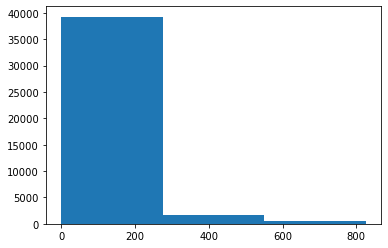

remainNewNum的特征分布如下：
2       1305
0       1275
17      1051
7        851
86       783
        ... 
74         1
4351       1
117        1
4713       1
715        1
Name: remainNewNum, Length: 392, dtype: int64


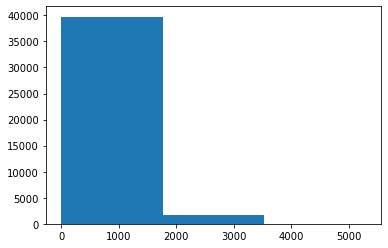

supplyNewNum的特征分布如下：
0      33077
328      366
480      333
422      278
350      224
       ...  
263        3
590        3
71         3
72         2
446        2
Name: supplyNewNum, Length: 104, dtype: int64


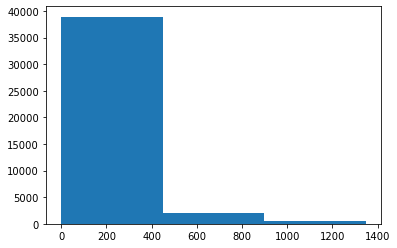

supplyLandNum的特征分布如下：
0    36356
1     3142
2     1537
3      405
Name: supplyLandNum, dtype: int64


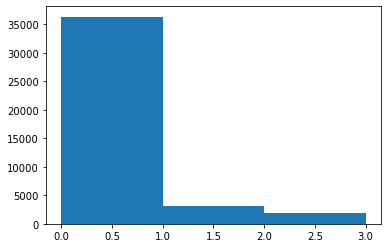

supplyLandArea的特征分布如下：
0.00         36356
90735.72       384
69919.92       255
105389.75      201
50803.74       199
255930.40      194
119850.56      183
187973.55      180
59981.40       179
138730.80      175
243769.88      160
135592.82      152
92751.20       149
128074.77      143
113075.80      137
88880.66       131
170720.70      130
411876.30      130
120615.78      121
112848.48      110
116648.64      106
59519.90       102
203724.72       94
30053.50        93
66038.49        86
108037.80       76
85269.20        75
96818.60        71
5113.60         65
26852.70        62
41130.80        60
283802.37       60
27060.24        58
40333.40        57
80218.58        57
72586.20        55
16065.27        54
155096.80       50
88191.75        47
186898.91       44
182724.80       42
32855.00        41
65655.53        41
555508.01       37
23756.75        37
135663.00       36
32488.38        31
101530.52       30
119340.36       29
33001.59        27
247712.44       25
98038.62

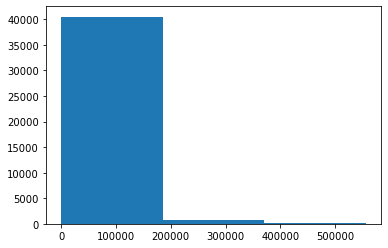

tradeLandNum的特征分布如下：
0    37691
1     2348
2      749
3      492
5      160
Name: tradeLandNum, dtype: int64


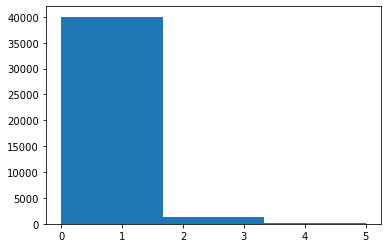

tradeLandArea的特征分布如下：
0.00         37691
112848.48      384
50803.74       199
162127.95      194
237828.35      180
25923.12       179
382500.68      160
255443.38      143
128074.77      141
203724.72      138
88880.66       131
197633.56      130
180222.60      130
190535.70      114
229724.44      106
59519.90       102
108037.80       76
85269.20        75
30053.50        73
328472.30       71
71152.09        65
40333.40        62
213401.12       60
92427.50        58
70401.25        57
41130.80        55
32488.38        50
26852.70        50
155096.80       48
40223.34        46
186898.91       45
62519.25        42
132870.00       42
65655.53        39
27060.24        39
33001.59        38
10467.00        37
152468.56       33
23756.75        29
555508.01       27
16065.27        27
32855.00        26
215627.62       25
12907.62        17
73496.64         5
68800.65         1
Name: tradeLandArea, dtype: int64


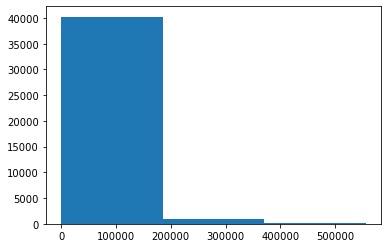

landTotalPrice的特征分布如下：
0             37691
400600000       384
182500000       199
2238680000      194
1078790000      180
88840000        179
1065270000      160
4640750000      143
1024600000      141
4278220000      138
1015190000      131
551480000       130
1136400000      130
2660380000      114
1086940000      106
253960000       102
332760000        76
282220000        75
268230000        73
1004970000       71
301080000        65
125030000        62
1090900000       60
2790750000       58
215520000        57
237200000        55
1010890000       50
85810000         50
743840000        48
144400000        46
6197570000       45
284460000        42
573070000        42
95230000         39
2462940000       39
110890000        38
78000000         37
1248900000       33
171070000        29
118470000        27
4262630000       27
142300000        26
931620000        25
93310000         17
441150000         5
135350000         1
Name: landTotalPrice, dtype: int64


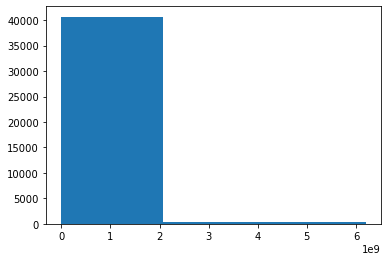

landMeanPrice的特征分布如下：
0.000000        37691
3549.892741       384
3592.255216       199
13808.106500      194
3427.056620       179
4536.002541       172
2785.014657       160
18167.431080      143
21000.004320      138
8000.014367       137
11421.944890      131
5750.035571       130
3059.993586       125
13962.632720      114
4731.494829       106
4266.808244       102
3080.033100        76
3309.753111        75
8925.083601        73
3059.527394        71
4231.499033        65
3099.912232        62
5111.969422        60
30193.935790       58
3061.309281        57
5766.967820        55
31115.432660       50
3195.581822        50
4795.972580        48
3589.955484        46
33160.011470       45
4549.958613        42
4313.012719        40
3519.185344        39
3360.141133        38
7451.991975        37
37513.062490       35
8191.196926        33
7200.900797        29
7673.390704        27
4331.152032        26
4320.504024        25
7374.292496        25
7229.063143        17
4536.00000

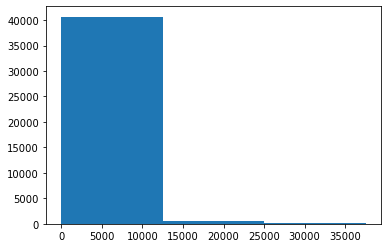

totalWorkers的特征分布如下：
4370      2043
28546     1958
50134     1837
46725     1816
388879    1516
          ... 
1190        40
1350        33
13736       15
600          3
132370       1
Name: totalWorkers, Length: 63, dtype: int64


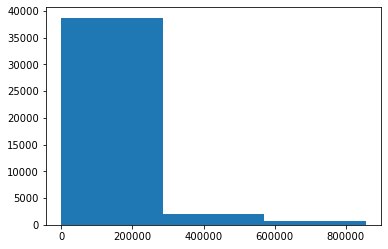

newWorkers的特征分布如下：
0       34416
724       158
765       152
657       143
5185      141
        ...  
62          3
161         3
1584        3
153         2
142         1
Name: newWorkers, Length: 179, dtype: int64


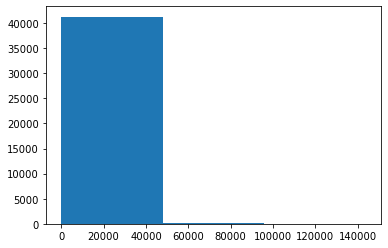

residentPopulation的特征分布如下：
306857    2043
371900    1958
226469    1837
928198    1816
491767    1516
          ... 
250864      40
215146      33
145454      15
234932       3
199528       1
Name: residentPopulation, Length: 63, dtype: int64


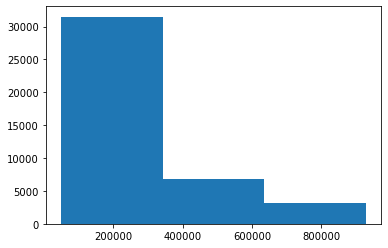

pv的特征分布如下：
52511.0    384
17471.0    374
25211.0    339
61150.0    314
42301.0    313
          ... 
7480.0       1
10863.0      1
19092.0      1
8701.0       1
352.0        1
Name: pv, Length: 709, dtype: int64


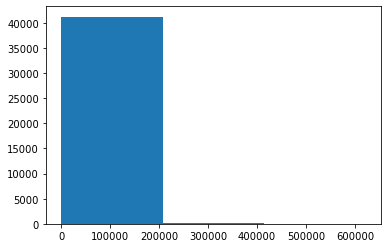

uv的特征分布如下：
4868.0    384
2554.0    374
2889.0    342
2187.0    339
5822.0    314
         ... 
203.0       1
933.0       1
79.0        1
651.0       1
754.0       1
Name: uv, Length: 649, dtype: int64


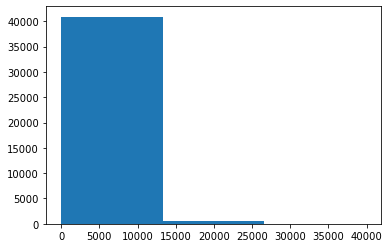

lookNum的特征分布如下：
0     37194
1      1159
2       903
3       565
4       404
5       295
6       211
7       154
8       134
9        91
10       79
11       52
12       48
13       34
15       23
14       23
17       18
16       13
19       11
18        9
21        4
23        3
20        2
37        2
25        2
29        1
22        1
24        1
26        1
27        1
28        1
30        1
Name: lookNum, dtype: int64


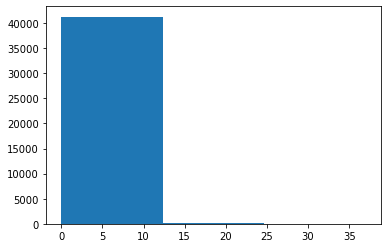

tradeTime的特征分布如下：
2018/3/3     543
2018/3/4     487
2018/3/11    410
2018/3/10    400
2018/3/24    341
            ... 
2018/1/2       5
2018/2/13      4
2018/2/20      2
2018/2/17      1
2018/2/19      1
Name: tradeTime, Length: 361, dtype: int64


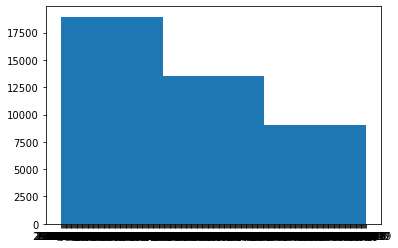

tradeMoney的特征分布如下：
4000.0     1450
3500.0     1345
4500.0     1222
3000.0     1209
5000.0     1165
           ... 
23600.0       1
3666.0        1
13999.0       1
23900.0       1
1225.0        1
Name: tradeMoney, Length: 836, dtype: int64


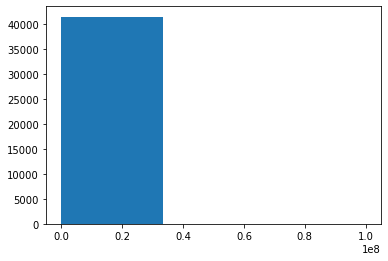

In [39]:
#特征分布
for feature in data_train.columns:
    print(feature + "的特征分布如下：")
    print(data_train[feature].value_counts())
    if feature != 'communityName': # communityName值太多，暂且不看图表
        plt.hist(data_train[feature], bins=3)
        plt.show()

In [40]:
# 统计特征值出现频次大于100的特征
for feature in data_train.columns:
    df_value_counts = pd.DataFrame(data_train[feature].value_counts())
    df_value_counts = df_value_counts.reset_index()
    df_value_counts.columns = [feature, 'counts'] # change column names
    print(df_value_counts[df_value_counts['counts'] >= 100])

Empty DataFrame
Columns: [ID, counts]
Index: []
    area  counts
0   90.0     303
1   89.0     266
2   10.0     203
3   60.0     202
4   50.0     193
5   40.0     188
6   88.0     182
7   12.0     172
8   80.0     169
9   70.0     167
10  55.0     156
11  13.0     156
12  85.0     144
13  56.0     138
14  15.0     137
15  14.0     135
16  52.0     113
17  30.0     112
18  57.0     110
19  78.0     110
20  35.0     108
21  42.0     108
22  54.0     108
23  58.0     108
24  37.0     106
25  65.0     105
26  45.0     104
27  53.0     103
28  51.0     101
  rentType  counts
0     未知方式   30759
1       整租    5472
2       合租    5204
   houseType  counts
0     1室1厅1卫    9805
1     2室1厅1卫    8512
2     2室2厅1卫    6783
3     3室1厅1卫    3992
4     3室2厅2卫    2737
5     4室1厅1卫    1957
6     3室2厅1卫    1920
7     1室0厅1卫    1286
8     1室2厅1卫     933
9     2室2厅2卫     881
10    4室2厅2卫     435
11    2室0厅1卫     419
12    4室2厅3卫     273
13    5室1厅1卫     197
14    2室1厅2卫     155
15    3室2厅3卫     149
16    3室1

10            9    1137
    drugStoreNum  counts
0             40    2623
1             39    2218
2             31    2080
3             69    2043
4            106    1958
5             34    1865
6             36    1837
7            174    1816
8             88    1516
9             35    1503
10           118    1375
11            37    1274
12            65    1266
13            94    1256
14            83    1253
15            54    1227
16            47    1156
17           145    1137
18            27    1110
19            22    1006
20            24     979
21            15     964
22            11     927
23            41     852
24            67     679
25            49     618
26            48     610
27            12     590
28            28     523
29            17     500
30            19     435
31            55     398
32            20     358
33            33     357
34            85     278
35            13     253
36             8     189
37            29     157
3

56              128045     122
           pv  counts
0     52511.0     384
1     17471.0     374
2     25211.0     339
3     61150.0     314
4     42301.0     313
..        ...     ...
114    1915.0     102
115   17732.0     102
116   13985.0     102
117  147221.0     101
118   19407.0     100

[119 rows x 2 columns]
          uv  counts
0     4868.0     384
1     2554.0     374
2     2889.0     342
3     2187.0     339
4     5822.0     314
..       ...     ...
121   8513.0     102
122   3465.0     102
123   1973.0     102
124  11867.0     101
125   2950.0     100

[126 rows x 2 columns]
   lookNum  counts
0        0   37194
1        1    1159
2        2     903
3        3     565
4        4     404
5        5     295
6        6     211
7        7     154
8        8     134
      tradeTime  counts
0      2018/3/3     543
1      2018/3/4     487
2     2018/3/11     410
3     2018/3/10     400
4     2018/3/24     341
..          ...     ...
179    2018/7/4     100
180   2018/5/25     100

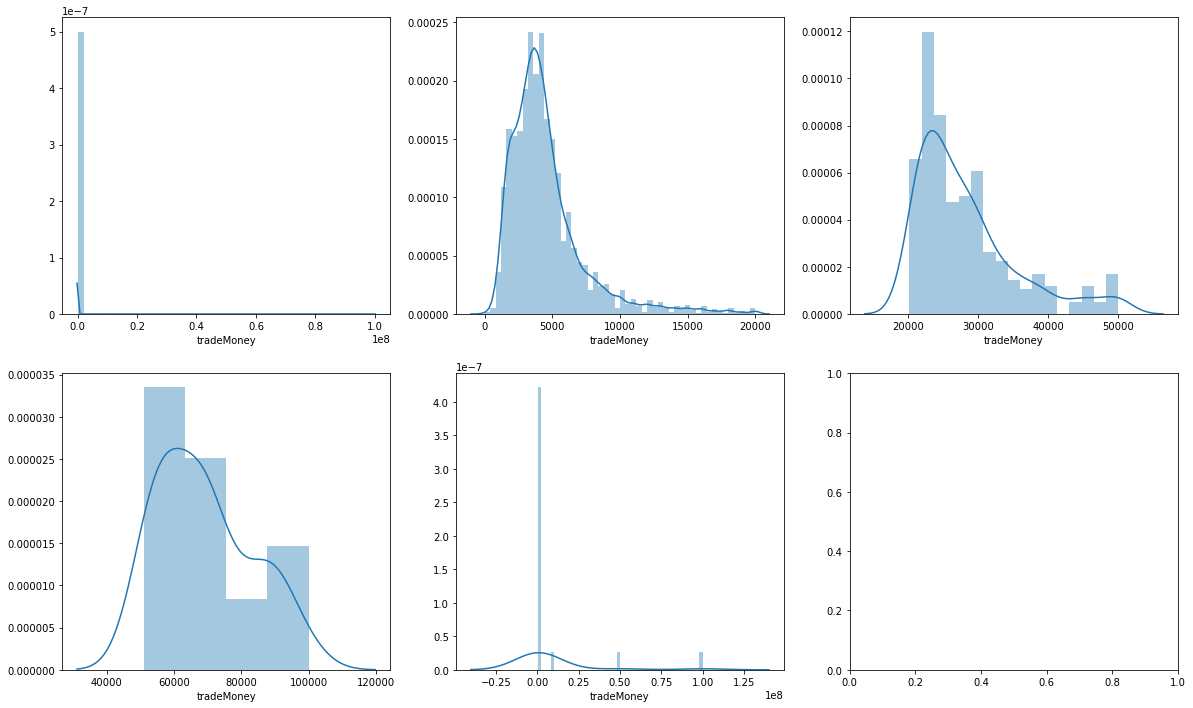

In [43]:
# Labe 分布
fig,axes = plt.subplots(2,3,figsize=(20,5))
fig.set_size_inches(20,12)
sns.distplot(data_train['tradeMoney'],ax=axes[0][0])
sns.distplot(data_train[(data_train['tradeMoney']<=20000)]['tradeMoney'],ax=axes[0][1])
sns.distplot(data_train[(data_train['tradeMoney']>20000)&(data_train['tradeMoney']<=50000)]['tradeMoney'],ax=axes[0][2])
sns.distplot(data_train[(data_train['tradeMoney']>50000)&(data_train['tradeMoney']<=100000)]['tradeMoney'],ax=axes[1][0])
sns.distplot(data_train[(data_train['tradeMoney']>100000)]['tradeMoney'],ax=axes[1][1])

In [44]:
print("money<=10000",len(data_train[(data_train['tradeMoney']<=10000)]['tradeMoney']))
print("10000<money<=20000",len(data_train[(data_train['tradeMoney']>10000)&(data_train['tradeMoney']<=20000)]['tradeMoney']))
print("20000<money<=50000",len(data_train[(data_train['tradeMoney']>20000)&(data_train['tradeMoney']<=50000)]['tradeMoney']))
print("50000<money<=100000",len(data_train[(data_train['tradeMoney']>50000)&(data_train['tradeMoney']<=100000)]['tradeMoney']))
print("100000<money",len(data_train[(data_train['tradeMoney']>100000)]['tradeMoney']))

money<=10000 38964
10000<money<=20000 1985
20000<money<=50000 433
50000<money<=100000 39
100000<money 19
